<a href="https://colab.research.google.com/github/nguyentientuanh/DA/blob/main/Ti%E1%BB%81n_x%E1%BB%AD_l%C3%BD_d%E1%BB%AF_li%E1%BB%87u_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Bài đọc] Mã hóa dữ liệu sử dụng kỹ thuật one-hot encoding

In [ ]:
import pandas as pd
s = pd.Series(['red', 'red', 'yellow', 'green', 'yellow'])
pd.get_dummies(s)

,green,red,yellow
0,False,True,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,False,True


## [Bài đọc] Mã hóa dữ liệu sử dụng kỹ thuật label encoding

In [ ]:
import pandas as pd
s = pd.Series(['red', 'red', 'yellow', 'green', 'yellow'])
s.astype('category').cat.codes

0    1
1    1
2    2
3    0
4    2
dtype: int8

## [Bài đọc] Mã hóa dữ liệu sử dụng kỹ thuật ordinal encoding

## [Thực hành] Rời rạc hóa các biến định lượng

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
# định nghĩa khoảng giá trị các nhóm
bins = [18, 25, 35, 60, 100]

In [ ]:
# thực hiện rời rạc hóa
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
# lấy ra index của nhóm tương ứng với các phần tử
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [ ]:
# lấy ra các nhóm
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [ ]:
# thống kê số lượng phần tử ở mỗi nhóm
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: count, dtype: int64

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64, left]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [ ]:
# danh sách nhãn
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [ ]:
# sinh dữ liệu ngẫu nhiên gồm 20 phần tử
data = np.random.rand(20)

In [ ]:
cut_data = pd.cut(data, 4, precision=2)
cut_data

[(0.73, 0.96], (0.51, 0.73], (0.055, 0.28], (0.055, 0.28], (0.055, 0.28], ..., (0.51, 0.73], (0.51, 0.73], (0.73, 0.96], (0.28, 0.51], (0.73, 0.96]]
Length: 20
Categories (4, interval[float64, right]): [(0.055, 0.28] < (0.28, 0.51] < (0.51, 0.73] <
                                           (0.73, 0.96]]

##[Thực hành] Thực hành trên bộ dữ liệu FoodPrice_in_Turkey

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [ ]:
df = pd.read_csv('/content/FoodPrice_in_Turkey.csv')

In [ ]:
# in ra kich thuoc du lieu
df.shape

(7381, 8)

In [ ]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [ ]:
# mô tả dữ liệu
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [ ]:
# thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [ ]:
# kiểm tra dữ liệu bị khuyết
df.isna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,False
7377,False,False,False,False,False,False,False,False
7378,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False


In [ ]:
# kiểm tra dữ liệu không bị khuyết
df.notna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
7376,True,True,True,True,True,True,True,True
7377,True,True,True,True,True,True,True,True
7378,True,True,True,True,True,True,True,True
7379,True,True,True,True,True,True,True,True


In [ ]:
# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [ ]:
df1.shape

(7381, 8)

Xử lý dữ liệu ngoại lai cho đặc trưng Price

<Axes: xlabel='Price'>

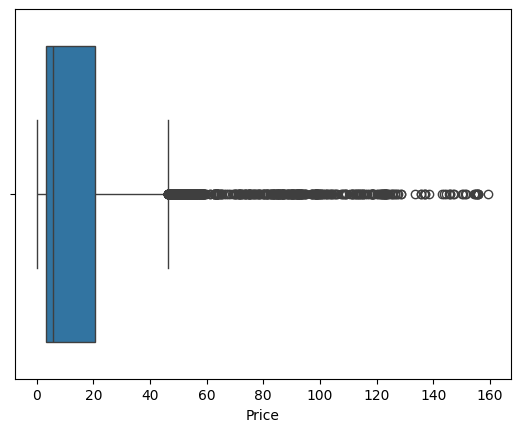

In [ ]:
sns.boxplot(x=df1['Price'])  # vẽ box plot cho dữ liệu ở cột Price

In [ ]:
Q1 = df1['Price'].quantile(0.25)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# xác định phần tử không phải ngoại lai
df2 = df1
df2['outlier'] = ~((df1['Price'] < (Q1 - 1.5*IQR)) | (df1['Price'] > (Q3 + 1.5*IQR)))

In [ ]:
# xóa phần tử ngoại lai
df2 = df2[df2['outlier'] == True]

<Axes: xlabel='Price'>

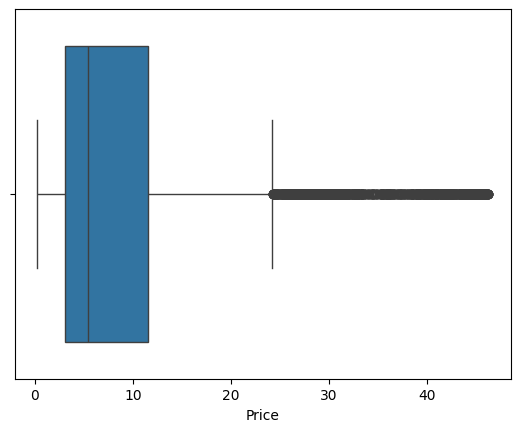

In [ ]:
sns.boxplot(x=df2['Price'])  # vẽ box plot cho dữ liệu ở cột Price

In [ ]:
# mô tả dữ liệu
df2['Price'].describe()

count    6784.000000
mean       10.503617
std        11.661447
min         0.253900
25%         3.079550
50%         5.373350
75%        11.541925
max        46.251900
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

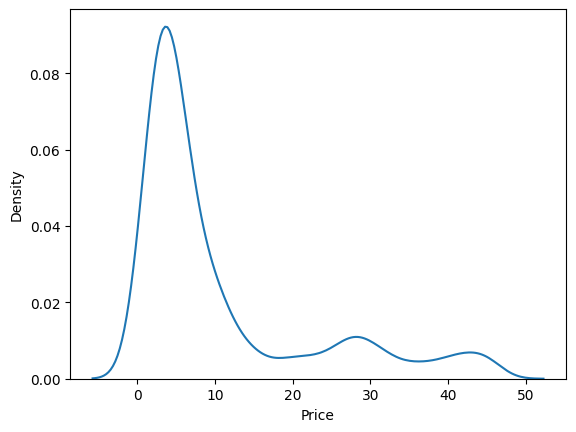

In [ ]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df2['Price'])

In [ ]:
# chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với Min max scaling ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [ ]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,6784.000000
mean,0.222830
std,0.253521
min,0.000000
25%,0.061430
50%,0.111297
75%,0.245403
max,1.000000
